# Calculating the Transformation Matrix

In [5]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job

backend = Aer.get_backend('statevector_simulator')

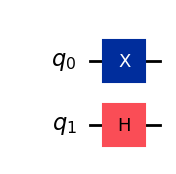

In [6]:
from qiskit import QuantumCircuit

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Apply the X gate to the first qubit
qc.x(0)

# Apply the Hadamard gate to the second qubit
qc.h(1)

qc.draw('mpl')

In [18]:
import pandas as pd

backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

# Display results
df = pd.DataFrame(unitary, columns=['Col1', 'Col2', 'Col3', 'Col4'])
pd.set_option('display.precision', 2)
print(df)


         Col1        Col2        Col3        Col4
0  0.00+0.00j  0.71+0.00j  0.00+0.00j  0.71-0.00j
1  0.71+0.00j  0.00+0.00j  0.71-0.00j  0.00+0.00j
2  0.00+0.00j  0.71+0.00j  0.00+0.00j -0.71+0.00j
3  0.71+0.00j  0.00+0.00j -0.71+0.00j  0.00+0.00j
